In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
def CONVERT_RGB_TO_MONOCHROME_BW(im_1,threshold=100):
    #im_1=plt.imread(image_1)
    im_2=np.zeros((im_1.shape[0],im_1.shape[1]))
    for i in range(im_1.shape[0]):
        for j in range(im_1.shape[1]):
            if(im_1[i,j,0]/3+im_1[i,j,1]/3+im_1[i,j,2]/3)>threshold:
                    im_2[i,j]=0
            else:
                    im_2[i,j]=1
            
    return im_2

In [76]:
def MF0_AND(L1,L2):
    n=len(L1)
    and_listesi=[]
    for i in range(n):
        a=(L1[i] and L2[i])
        and_listesi.append(a)
    return and_listesi
def MF1_ANDorOR(L1,operator=0):
    if operator:
        if 1 in L1:
            s1=1
        else:
            s1=0
    else:
        if 0 in L1:
            s1=0
        else:
            s1=1
            
    return s1
def MF2_COMBINE(L1,L2,operator=0):
    a=MF0_AND(L1,L2)
    return MF1_ANDorOR(a,operator)
    

In [77]:
def DILATION(img_1,mask):
    m=img_1.shape[0]
    n=img_1.shape[1]
    img_2=np.random.randint(0,1,(m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            x_1=img_1[i,j] == mask[1][1]
            
            x_2=img_1[i-1,j-1] ==  mask[0][0]
            x_3=img_1[i-1,j] ==  mask[0][1]
            x_4=img_1[i-1,j+1] ==  mask[0][2]
            
            x_5=img_1[i+1,j-1] ==  mask[2][0]
            x_6=img_1[i+1,j] ==  mask[2][1]
            x_7=img_1[i+1,j+1] ==  mask[2][2]
            
            x_8=img_1[i,j-1] ==  mask[1][0]
            x_9=img_1[i,j+1] == mask[1][2]
            
            result_1 = x_1 or x_2 or x_3 or x_4 or x_5
            result_2 = x_6 or x_7 or x_8 or x_9
            
            result = result_1 or result_2
            img_2[i,j]=result
    return img_2

def DEFINE_MASK_1():
    mask_1=[[1,1,1],[1,1,1],[1,1,1]]
    ## mask,mask[1][2],mask[0][0],mask[2][2]
    ## for i in range(3):
    ##     for j in range(3):
    ##         print(mask[i][j],end=" ")
    ##     print()
    return mask_1
def DEFINE_MASK_2():
    mask_1=[[0,0,0],[0,0,0],[0,0,0]]
    ## mask,mask[1][2],mask[0][0],mask[2][2]
    ## for i in range(3):
    ##     for j in range(3):
    ##         print(mask[i][j],end=" ")
    ##     print()
    return mask_1


In [78]:
liste=[0,0,1,0,1]
liste2=[1,1,1,1,1]

MF2_COMBINE(liste,liste2,1)

1

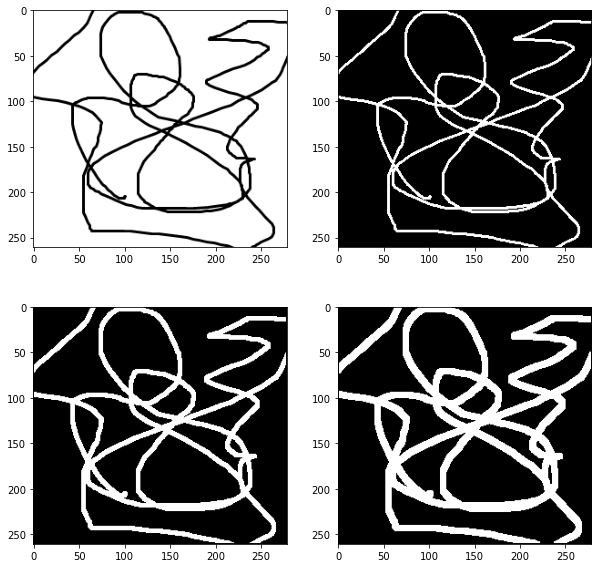

In [82]:
path=r'C:\\Users\\hakan\\Görüntü İşleme\\bharf.png'
img=plt.imread(path)

img_convertbw=CONVERT_RGB_TO_MONOCHROME_BW(img,0.5)
img_dilation=DILATION(img_convertbw,DEFINE_MASK_1())
img_redilation=DILATION(img_dilation,DEFINE_MASK_1())

plt.figure(figsize=(10,10))

plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(img_convertbw,cmap='gray')
plt.subplot(2,2,3),plt.imshow(img_dilation,cmap='gray')
plt.subplot(2,2,4),plt.imshow(img_redilation,cmap='gray')
plt.show()